# Linear Regression

## Data
From kaggle dataset:
https://www.kaggle.com/camnugent/california-housing-prices
* Originally in Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.
* 1990 census data housing price
* has 10 columns: longitude, latitude,housingmedianage, total_rooms ,total_bedrooms,population,households,median_income,medianhousevalue,ocean_proximity


In [2]:
import pandas as pd
df = pd.read_csv('./others/housing.csv')

In [35]:
# 20640 rows x 10 columns
df.describe

True

In [38]:
df.dropna(inplace=True)

In [40]:
# 20433 rows x 10 columns
df.describe

<bound method NDFrame.describe of        housing_median_age  total_rooms  total_bedrooms  population  \
0                    41.0        880.0           129.0       322.0   
1                    21.0       7099.0          1106.0      2401.0   
2                    52.0       1467.0           190.0       496.0   
3                    52.0       1274.0           235.0       558.0   
4                    52.0       1627.0           280.0       565.0   
...                   ...          ...             ...         ...   
20635                25.0       1665.0           374.0       845.0   
20636                18.0        697.0           150.0       356.0   
20637                17.0       2254.0           485.0      1007.0   
20638                18.0       1860.0           409.0       741.0   
20639                16.0       2785.0           616.0      1387.0   

       households  median_income  median_house_value  
0           126.0         8.3252            452600.0  
1          1138

In [41]:
# since ocean_proximity has multiple cateogories, want to drop it and not use in prediciton to simplify model
# also won't take into account of longitude and latitude for now
df.drop(columns=['longitude', 'latitude','ocean_proximity'], inplace=True)

KeyError: "['longitude' 'latitude' 'ocean_proximity'] not found in axis"

In [42]:
# 20433 rows x 7 columns
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


# Exploratory data analysis
* first, a scatterplot matrix with mlxtend - looking at pairwise correlation
* from the image below, we can see that:
    * toal_rooms and total_bedrooms correlated
    * total_rooms and households correlated
    * total_bedrooms and households correlated
    * very slight correlation between medina income and the median_house_value

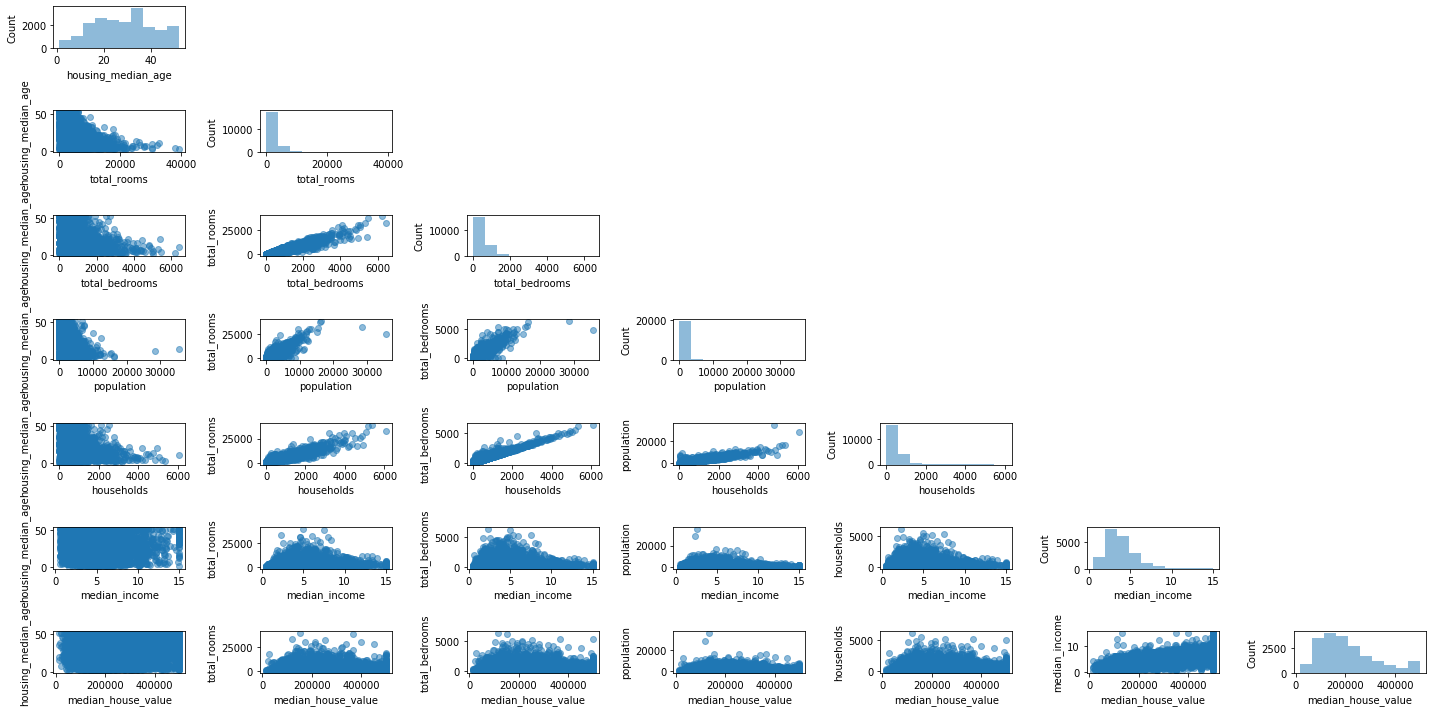

In [43]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols = ['housing_median_age', 'total_rooms', 'total_bedrooms','population', 'households', 'median_income','median_house_value']
scatterplotmatrix(df[cols].values,figsize=(20,10), names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

# Correlation Matrix
* similar to covariance matrix, can be viewed as a rescaled version 
* square matrix that contains the Pearson product-moment correlation coefficient (Pearson's r): measures the linear dependence between pairs of features, ranges from -1 to 1
    * postive correlation if r=1, no correlation if r=0, and perfect negative correlation if r=-1
    * $ r = \frac {\sigma_{xy}} {\sigma_x \sigma_y}$ 
    * $ \sigma_{xy}$ is the covariance between the features x and y, and $\sigma_x$ and $\sigma_y$ are the features' standard deviations
* covariance between a pair of STANDARDIZED features is equal to their linear correlation coefficient
* we can see that:
    * total_rooms and total_bedrooms
    * total_rooms and housholds
    * total_rooms and population
    * median_income and median_house_value


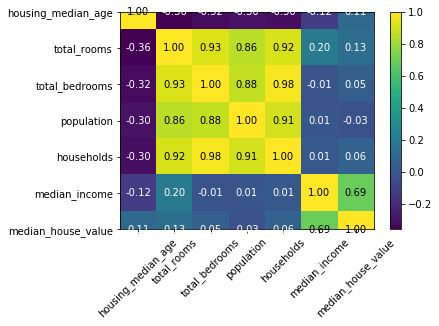

In [48]:
from mlxtend.plotting import heatmap
import numpy as np
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)
plt.show()

# Ordinary least squares linear regression model
* Adaline without the unit step function so we obtain continous target values instead of the class label -1 and 1, and then optimize (minimize) the cost function with other algorithms such as gradient descent
* cost function is sum of squared errors (SSE) : $J(w) = \frac{1}{2} \sum_{i=1}^n (y^{(i)} - \hat{y}^{(i)})^2$

In [67]:
# defining the linear regression class with gradient descent
class LinearRegressionGD(object):
    def __init__ (self, eta=0.001, n_iter=20):
        self.eta = eta # the learning rate
        self.n_iter = n_iter # number of iteration 
    def fit(self,X,y):
        self.w_ = np.zeros(1+ X.shape[1]) # x0 is always 1
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum() # w0 is special
            cost = (errors**2).sum()/2
            self.cost_.append(cost)
        return self
    def net_input(self,X): # want to combine the weights and X
        return np.dot(X, self.w_[1:]+self.w_[0])
    def predict(self,X):
        return self.net_input(X)

In [124]:
# setting what the input and values are- highest correlation between median_house_value and median_income
X = df[['total_bedrooms']].values
y = df['total_rooms'].values

# make them standard normal
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
# most transformers in scikit-learn expect data to be stored in 2D arrays, this added a new dimension to the array and then reduce it by flatterning it
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()
lr = LinearRegressionGD(eta=0.00001, n_iter=30)
lr.fit(X_std,y_std)

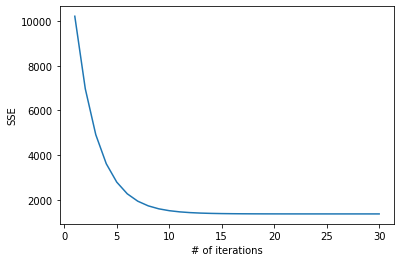

In [125]:
# visualzing the cost function
plt.plot(range(1, lr.n_iter+1),lr.cost_)
plt.ylabel('SSE')
plt.xlabel('# of iterations')
plt.show()
# as expecting, going down

In [126]:
#printing the weights
print('slope: %.3f'%lr.w_[1])
print('slope: %.3f'%lr.w_[0])

slope: 0.929
slope: 0.000


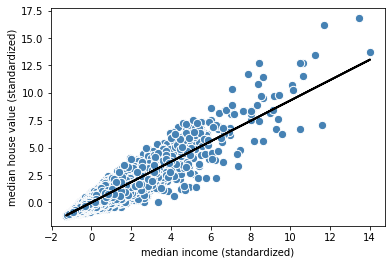

In [127]:
# want to plot the scatterplot of the training exampels and the regression line
def linregplot(X,y,model):
    plt.scatter(X,y,c='steelblue',edgecolor='white',s=70)
    plt.plot(X,model.predict(X),c='black',lw=2)
    return None

linregplot(X_std,y_std,lr)
plt.xlabel('total bedrooms (standardized)')
plt.ylabel('total rooms (standardized)')
plt.show()

In [129]:
# to get the predicted price outcome back to original axis, apply the inverse_transform method
# let's say we want to predict the price of a house with median income of 5.64
med_income_std = sc_x.transform(np.array([[5.64]]))
price_std = lr.predict(med_income_std)
print("total rooms %i" %sc_y.inverse_transform(price_std))

total rooms 71


In [131]:
# now using sklearn
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
# non-standardized
slr.fit(X,y)
y_pred = slr.predict(X)
print('slope: %.3f'%slr.coef_[0])
print('intercept: %.3f'%slr.intercept_)

slope: 4.825
intercept: 41.346


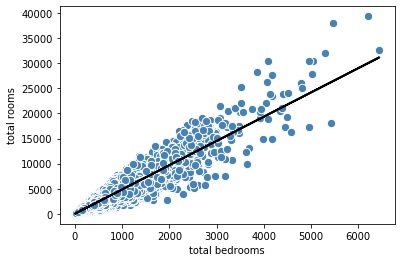

In [132]:
linregplot(X,y,slr)
plt.xlabel('total bedrooms')
plt.ylabel('total rooms')
plt.show()

# RANdom SAmple Consensus (RANSAC)
* fits a regression model to a subset of the data, the inliers
* reduce the impact of outliers on the linear regression model

In [133]:
# Using RANSAC algorithm
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,loss='absolute_loss',random_state=0)
ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50, random_state=0,
                residual_threshold=None, stop_n_inliers=inf,
                stop_probability=0.99, stop_score=inf)

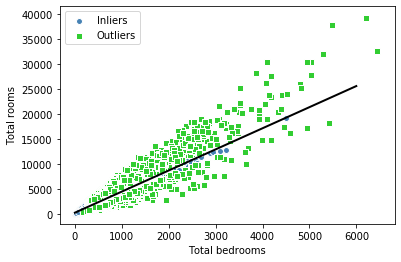

In [135]:
# plotting the inliers and the outliers
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(0,6000,1)
line_y_ransac = ransac.predict(line_X[:,np.newaxis])
plt.scatter(X[inlier_mask],y[inlier_mask],c='steelblue',edgecolor='white',marker='o',label="Inliers")
plt.scatter(X[outlier_mask],y[outlier_mask],c='limegreen',edgecolor='white',marker='s',label="Outliers")
plt.plot(line_X,line_y_ransac,color='black',lw=2)
plt.xlabel('Total bedrooms')
plt.ylabel('Total rooms')
plt.legend(loc='upper left')
plt.show()

In [136]:
print('slope: %.3f '%ransac.estimator_.coef_[0])
print('intercept:%.3f'%ransac.estimator_.intercept_)

slope: 4.230 
intercept:246.668


# Evaluating performance
* Now want to do an actual training, testing and evaluating
* sklearn implementation

In [137]:
# Evaluating the performance
from sklearn.model_selection import train_test_split
# X is everything except median house value
X = df.iloc[:,:-1].values
y = df['median_house_value'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

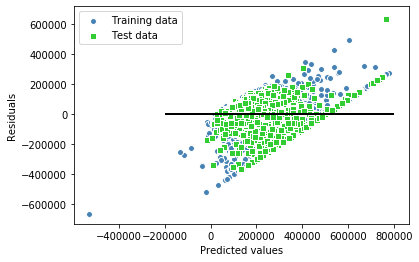

In [138]:
# plotting residual plots - can detect nonlinearity and outliers and check if errors are randomly distributed
plt.scatter(y_train_pred,y_train_pred - y_train, c='steelblue',marker='o', edgecolor='white',label='Training data')
plt.scatter(y_test_pred,y_test_pred - y_test, c='limegreen',marker='s', edgecolor='white',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-200000, xmax=800000,lw=2)
plt.show()

* Obviously some kind of pattern above, meaning our model is unable to capture some explanatory info.

* To quantitative compare models or tune paramters, use MSE 

In [139]:
# calculating the mean squarred error (MSE)
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f'%(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))

MSE train: 5790015691.980, test: 5710180252.117


* train and test error similar, so not overfitting, but definitely underfitting since the erros are so large

In [140]:
# calculating R2 which is the standardized version of MSE:
from sklearn.metrics import r2_score
print('R^2 train: %.3f,test: %.3f'%(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

R^2 train: 0.565,test: 0.574


* R2 of 0.56, pretty terrible, can improve model better

# Regularization

## Ridge Regression
* L2 penalized model where we simply add the squared sum of the weights to our least-squared cost function:
* J(w)Ridge = $\sum_{1}^n (y^{(i)} -\hat{y}^{(i)})^2 + \lambda ||w||_2^2$ where L2: $\lambda ||w||_2^2 = lambda \sum_{j=1}^m w_j^2$

## LASSO (least absolute shrinkage and selection operator)
* J(w) LASSO = $\sum_{i=1}^n (y^{(i)}-\hat{y}^{(i)})^2)+lambda||w||_1$ where L1: $\lambda ||w||_1 = lambda \sum_{j=1}^m |w_j|$
* sum of the absolute magnitudes of the model weights
* select at most n features if m>n where n is the number of training examples
* avoid saturated models

## Elastic Net
* J(w)ElasticNet = $\sum_{i=1}^n (y^{(i)}-\hat{y}^{(i)})^2 + \lambda_1 \sum_{j=1}^m w_j^2 + \lambda_2 \sum_{j=1}^m |w_j|$
* comprimise between LASSO and ElasticNet, has L1 penalty to genreate sparsity and l2 to select more than n features if m>n

In [141]:
# ridge
from sklearn.linear_model import Ridge
# alpha is similar to paramter lambda
ridge = Ridge(alpha=1.0)

# LASSO
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

# ElasticNet
from sklearn.linear_model import ElasticNet
# if l1_ratio = 1.0, would be equal to LASSO regression
elanet = ElasticNet(alpha=1.0,l1_ratio=0.5)

Polynomial regression

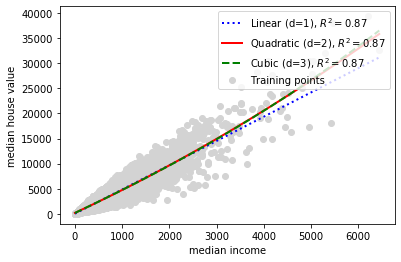

In [143]:
from sklearn.preprocessing import PolynomialFeatures
# define X and y
X = df[['total_bedrooms']].values
y = df['total_rooms'].values

# define different polynomial
regr= LinearRegression()
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)
X_fit = np.arange(X.min(),X.max(),1)[:,np.newaxis]

# fitting
regr = regr.fit(X,y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y,regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y,regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y,regr.predict(X_cubic))

# plotting
plt.scatter(X,y,label='Training points',color='lightgray')
plt.plot(X_fit,y_lin_fit,label='Linear (d=1), $R^2=%.2f$'%linear_r2,color='blue',lw=2,linestyle=':')
plt.plot(X_fit,y_quad_fit,label='Quadratic (d=2), $R^2=%.2f$'%quadratic_r2,color='red',lw=2,linestyle='-')
plt.plot(X_fit,y_cubic_fit,label='Cubic (d=3), $R^2=%.2f$'%cubic_r2,color='green',lw=2,linestyle='--')
plt.xlabel('median income')
plt.ylabel('median house value')
plt.legend(loc='upper right')
plt.show()

## Log-transform
* if a relationship looks like exponential function : f(x) = $e^{-x}$ then want to do log transformation
* ours definitely is not exponential

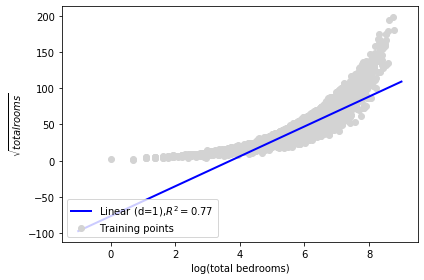

In [147]:
# transform features into log scale
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit
X_fit = np.arange(X_log.min()-1,X_log.max()+1,1)[:,np.newaxis]
regr = regr.fit(X_log,y_sqrt)

y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt,regr.predict(X_log))

#plot
plt.scatter(X_log,y_sqrt,label='Training points',color='lightgray')
plt.plot(X_fit,y_lin_fit,label='Linear (d=1),$R^2=%.2f$'%linear_r2,color='blue',lw=2)
plt.xlabel('log(total bedrooms)')
plt.ylabel('$\sqrt{total rooms}$')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# not exponential at all